In [46]:
import tensorflow as tf
from keras.layers import Dense, Conv2D
from keras.utils import image_dataset_from_directory
from keras import Sequential
from google.colab import drive
import os
import matplotlib.pyplot as plt
import numpy as np


In [47]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [48]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
!unzip -uq "/content/drive/MyDrive/dataset/planetku/dataset.zip" -d "/content/drive/MyDrive/dataset/planetku/planetku"

In [64]:
PATH = 'drive/MyDrive/dataset/planetku/planetku'

In [68]:
from PIL import Image
import glob
import os

# Update with the path to your main dataset directory
dataset_path = "drive/MyDrive/dataset/planetku/planetku/"

# Iterate through all files and subdirectories in the dataset path
for img_path in glob.glob(os.path.join(dataset_path, "*", "*")):  # This will enter each class folder
    if os.path.isfile(img_path):  # Check if it's a file (not a directory)
        try:
            with Image.open(img_path) as img:
                img.convert("RGB").save(img_path, "JPEG")  # Convert and save as JPEG
        except Exception as e:
            print(f"Error converting {img_path}: {e}")
    else:
        print(f"Skipped directory: {img_path}")


Error converting drive/MyDrive/dataset/planetku/planetku/styrofoam/STYROFOAM (15).png: XMP data is too long


In [69]:
training_dataset, validation_dataset = image_dataset_from_directory(
        directory=PATH,
        image_size=(150, 150),
        batch_size=128,
        label_mode='categorical',
        validation_split=0.2,
        subset='both',
        seed=42,
        interpolation='nearest'
    )

Found 10750 files belonging to 10 classes.
Using 8600 files for training.
Using 2150 files for validation.


In [70]:
data_augmentation = Sequential([
    tf.keras.layers.Input(shape=(150, 150, 3)),
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.4),
])

training_dataset = training_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))

In [71]:
len(validation_dataset.class_names)

10

In [72]:
pre_trained_model = tf.keras.applications.ResNet50V2(
    include_top=False,
    input_shape=(150, 150, 3),
)

pre_trained_model.trainable = False

In [73]:
pre_trained_model.summary()

Model: "resnet50v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 150, 150, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 156, 156, 3)    │              0 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 75, 75, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 77, 77, 64)     │              0 │ conv1_conv[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 38, 38, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_bn    │ (None, 38, 38, 64)     │            256 │ pool1_pool[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_relu  │ (None, 38, 38, 64)     │              0 │ conv2_block1_preact_b… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 38, 38, 64)     │          4,096 │ conv2_block1_preact_r… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 38, 38, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 38, 38, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_pad        │ (None, 40, 40, 64)     │              0 │ conv2_block1_1_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 38, 38, 64)     │         36,864 │ conv2_block1_2_pad[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 38, 38, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 38, 38, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv  

 Total params: 23,564,800 (89.89 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,564,800 (89.89 MB)

In [74]:
class EarlyStoppingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs['accuracy']>0.95:
            self.model.stop_training = True
            print("\nReached 99.9% accuracy so cancelling training!")

In [57]:
# try:
#     tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # Automatically detects TPU
#     tf.config.experimental_connect_to_cluster(tpu)
#     tf.tpu.experimental.initialize_tpu_system(tpu)
#     strategy = tf.distribute.TPUStrategy(tpu)
#     print("TPU connected successfully")
# except ValueError:
#     print("No TPU found. Please enable TPU in Runtime > Change runtime type.")

In [58]:
# combined_model = tf.keras.Sequential([
#     data_augmentation,
#     pre_trained_model  # Pre-trained model loaded here
# ])

# # Extract output from the pre-trained model (assuming it's the last layer)
# last_output = combined_model.layers[-1].output

In [75]:
# with strategy.scope():
last_output = pre_trained_model.output
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(10, activation='softmax')(x)

# Define the model with input and output layers specified
model = tf.keras.Model(inputs=pre_trained_model.input, outputs=x)

# Compile the model
model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [76]:
model = tf.keras.models.Sequential([
        tf.keras.Input(shape=(150, 150, 3)),
        tf.keras.layers.Rescaling(1./255),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(10, activation='sigmoid')
    ])


model.compile(
        optimizer='Adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
	)

In [77]:
history = model.fit(
    training_dataset,
    validation_data = validation_dataset,
    epochs=100,
    verbose=2,
    callbacks = [EarlyStoppingCallback()]
)

Epoch 1/100
68/68 - 90s - 1s/step - accuracy: 0.3245 - loss: 1.9590 - val_accuracy: 0.4177 - val_loss: 1.7396
Epoch 2/100
68/68 - 114s - 2s/step - accuracy: 0.4762 - loss: 1.5360 - val_accuracy: 0.4958 - val_loss: 1.4709
Epoch 3/100
68/68 - 51s - 753ms/step - accuracy: 0.5297 - loss: 1.3825 - val_accuracy: 0.5009 - val_loss: 1.4664
Epoch 4/100
68/68 - 55s - 803ms/step - accuracy: 0.5600 - loss: 1.2846 - val_accuracy: 0.5433 - val_loss: 1.3523
Epoch 5/100
68/68 - 83s - 1s/step - accuracy: 0.5784 - loss: 1.2284 - val_accuracy: 0.5363 - val_loss: 1.3457
Epoch 6/100
68/68 - 96s - 1s/step - accuracy: 0.6060 - loss: 1.1615 - val_accuracy: 0.6028 - val_loss: 1.2212
Epoch 7/100
68/68 - 61s - 899ms/step - accuracy: 0.6278 - loss: 1.0965 - val_accuracy: 0.5916 - val_loss: 1.2371
Epoch 8/100
68/68 - 88s - 1s/step - accuracy: 0.6397 - loss: 1.0617 - val_accuracy: 0.6033 - val_loss: 1.2126
Epoch 9/100
68/68 - 63s - 924ms/step - accuracy: 0.6552 - loss: 1.0190 - val_accuracy: 0.5921 - val_loss: 1.25

In [ ]:
# import os
# from PIL import Image

# def remove_non_images(directory):
#     for root, _, files in os.walk(directory):
#         for file in files:
#             file_path = os.path.join(root, file)
#             try:
#                 # Try to open the file as an image
#                 img = Image.open(file_path)
#                 img.verify()  # Check if it's a valid image
#             except (IOError, SyntaxError):
#                 # If not a valid image, delete the file
#                 print(f"Removing invalid image file: {file_path}")
#                 os.remove(file_path)

# # Run the function on your dataset directory
# remove_non_images(PATH)

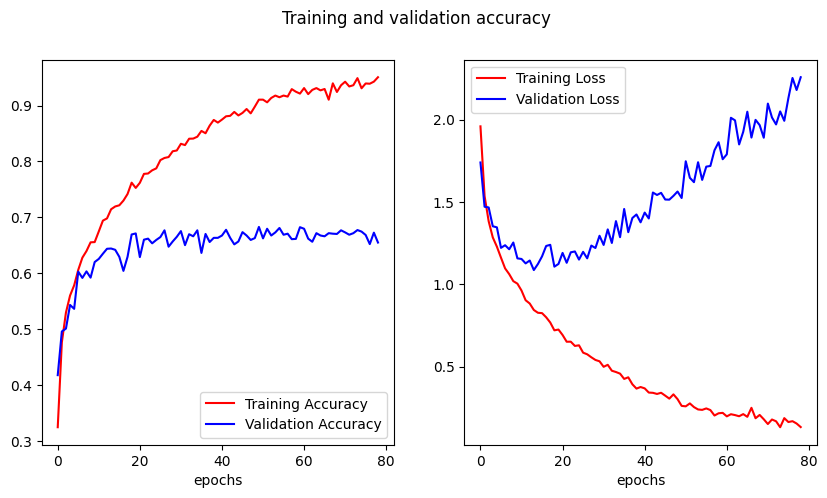

In [78]:
# Get training and validation accuracies
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation accuracy')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

plt.show()

In [79]:
model.save(f"{PATH}/model.h5")